<a href="https://colab.research.google.com/github/Tamrika/Deep-Learning/blob/main/Image_Classification_NN_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic classification: Classify images of clothing

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

print(tf.__version__)

2.4.1


## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [ ]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [ ]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [ ]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [ ]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

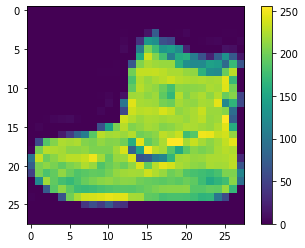

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

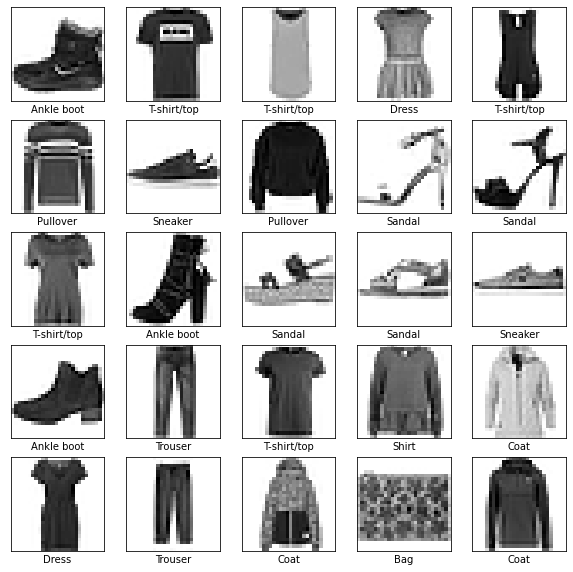

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


# Split the data(Q4)
Split the training images into train and validation images. Use 50K images for training and 10K images for validation. We will use validation set to tune the model

In [ ]:
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=10000, random_state=1)
print(train_images.shape)
print(train_labels.shape)
print(val_images.shape)
print(val_labels.shape)

(50000, 28, 28)
(50000,)
(10000, 28, 28)
(10000,)


In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(val_images.shape)
print(val_labels.shape)

(50000, 28, 28)
(50000,)
(10000, 28, 28)
(10000,)


## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model(Q5)

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data and passed the validation data to the model.fit method as follows:

In [ ]:
model.fit(train_images, train_labels, validation_data=(val_images, val_labels),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.6418 - accuracy: 0.7733 - val_loss: 0.4107 - val_accuracy: 0.8569
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3927 - accuracy: 0.8606 - val_loss: 0.4065 - val_accuracy: 0.8513
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3512 - accuracy: 0.8718 - val_loss: 0.3862 - val_accuracy: 0.8665
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3195 - accuracy: 0.8806 - val_loss: 0.3467 - val_accuracy: 0.8782
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3023 - accuracy: 0.8881 - val_loss: 0.3264 - val_accuracy: 0.8814
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2940 - accuracy: 0.8921 - val_loss: 0.3256 - val_accuracy: 0.8827
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2700 - accuracy: 0.8995 - val_loss: 0.3261 - val_accuracy:

### Plot the learning curves(Q5)

In [ ]:
def plotModel():
#getting train and validation accuracies
  acc = model.history.history['accuracy']
  val_acc = model.history.history['val_accuracy']
#getting train and validation losses
  loss = model.history.history['loss']
  val_loss = model.history.history['val_loss']
#plotting the training and validation accurracies
  plt.plot(acc, 'b', label='Training acc')
  plt.plot(val_acc, 'r', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
#plotting the train and validaiton losses
  plt.plot(loss, 'b', label='Training loss')
  plt.plot(val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()


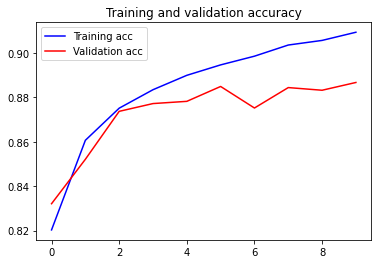

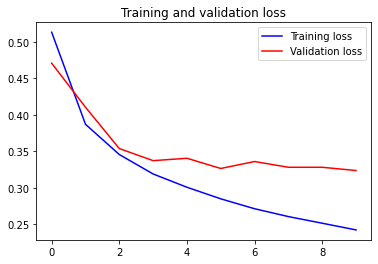

In [ ]:
plotModel()

**• Does your model overfit?**
Yes, the model slightly overfitting. There is a substantial difference between training and validation loss/accuracy after a certain point.

**• Does the training and validation loss continue to decrease after the last epoch?**
Yes, both training and validation loss continue to decrease after the last epoch in their pace.


# Model Optimization(Q6)
## 1.Applying learning rate scheduling

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.6461 - accuracy: 0.7759 - val_loss: 0.3965 - val_accuracy: 0.8588
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3944 - accuracy: 0.8585 - val_loss: 0.3722 - val_accuracy: 0.8656
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3458 - accuracy: 0.8751 - val_loss: 0.3629 - val_accuracy: 0.8687
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3108 - accuracy: 0.8870 - val_loss: 0.3360 - val_accuracy: 0.8785
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2957 - accuracy: 0.8911 - val_loss: 0.3466 - val_accuracy: 0.8729
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2790 - accuracy: 0.8981 - val_loss: 0.3185 - val_accuracy: 0.8857
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2600 - accuracy: 0.9037 - val_loss: 0.3182 - val_accuracy:

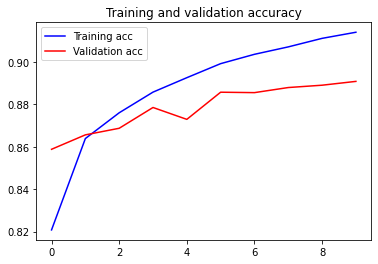

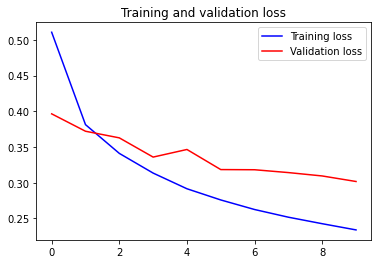

In [ ]:
#setting the random seed for reproducibility
random.seed(2)
np.random.seed(2)
tf.random.set_seed(2)

#Model creation
model=tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10)
    ])

#create a learning_rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9)

#configuring and compiling the model
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'], optimizer=opt)

# Fit the data on the model
model.fit(train_images, train_labels, validation_data=(val_images, val_labels),epochs=10)

# Plot Validation parameters
plotModel()

### Model is still overfitting and the loss continued to decrease

## 2. Applying learning rate scheduling and SGD with momentum optimizer

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.8341 - accuracy: 0.7142 - val_loss: 0.4891 - val_accuracy: 0.8267
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4505 - accuracy: 0.8413 - val_loss: 0.4244 - val_accuracy: 0.8514
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3980 - accuracy: 0.8609 - val_loss: 0.3947 - val_accuracy: 0.8598
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3783 - accuracy: 0.8678 - val_loss: 0.3956 - val_accuracy: 0.8602
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3558 - accuracy: 0.8750 - val_loss: 0.3955 - val_accuracy: 0.8586
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3565 - accuracy: 0.8755 - val_loss: 0.3695 - val_accuracy: 0.8688
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3295 - accuracy: 0.8871 - val_loss: 0.3710 - val_accuracy:

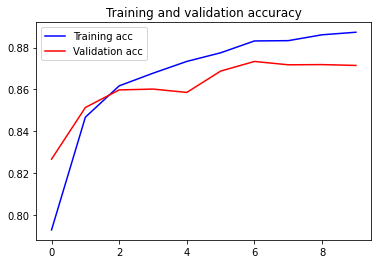

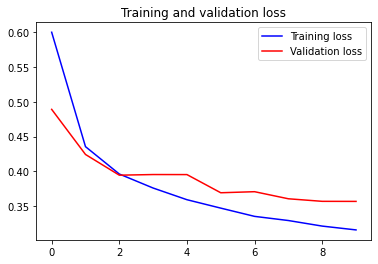

In [ ]:


#setting the random seed for reproducibility
random.seed(3)
np.random.seed(3)
tf.random.set_seed(3)

#Model creation
model=tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10)
    ])

#create a learning_rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9)

#configuring and compiling the model
opt = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.98, nesterov=True)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'], optimizer=opt)


# Fit the data on the model
model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=10)

# Plot Validation parameters
plotModel()

### Model is still overfitting, better than the previous model and loss continued to decrease

## 3. Applying learning rate scheduling, SGD with momentum optimizer, and batchnormalization. 

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.6647 - accuracy: 0.7637 - val_loss: 0.4614 - val_accuracy: 0.8310
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.4128 - accuracy: 0.8519 - val_loss: 0.4606 - val_accuracy: 0.8404
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3769 - accuracy: 0.8644 - val_loss: 0.3836 - val_accuracy: 0.8624
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3511 - accuracy: 0.8713 - val_loss: 0.3673 - val_accuracy: 0.8722
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3353 - accuracy: 0.8770 - val_loss: 0.3573 - val_accuracy: 0.8724
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.3280 - accuracy: 0.8789 - val_loss: 0.3420 - val_accuracy: 0.8804
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2987 - accuracy: 0.8912 - val_loss: 0.3342 - val_accuracy:

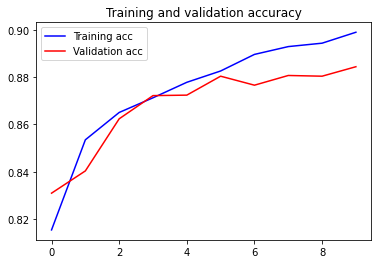

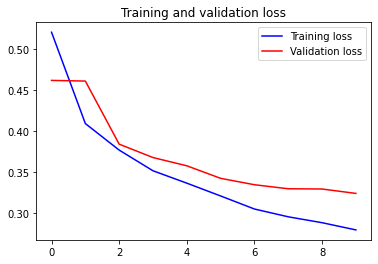

In [ ]:


#setting the random seed for reproducibility
random.seed(11)
np.random.seed(11)
tf.random.set_seed(11)

#Model creation
model=tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(10)
    ])

#create a learning_rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9)

#configuring and compiling the model
opt = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.98, nesterov=True)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'], optimizer=opt)


# Fit the data on the model
model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=10)

# Plot Validation parameters
plotModel()

### **Does applying any of these techiques to your model help improve the learning?** 
After applying learning rate scheduling, SGD with momentum optimizer, and batchnormalization, the model is still slightly overfitting but better than the model without optimizations. Loss is still decreasing after the last epoch.

# Adding more layers to reduce training loss further until your model starts overfitting.(Q7)

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 0.5801 - accuracy: 0.7972 - val_loss: 0.4160 - val_accuracy: 0.8465
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3883 - accuracy: 0.8594 - val_loss: 0.3687 - val_accuracy: 0.8656
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3450 - accuracy: 0.8727 - val_loss: 0.3417 - val_accuracy: 0.8753
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3160 - accuracy: 0.8821 - val_loss: 0.3454 - val_accuracy: 0.8731
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2906 - accuracy: 0.8929 - val_loss: 0.3665 - val_accuracy: 0.8712
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2737 - accuracy: 0.8982 - val_loss: 0.3179 - val_accuracy: 0.8857
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2549 - accuracy: 0.9045 - val_loss: 0.3095 - val_accuracy:

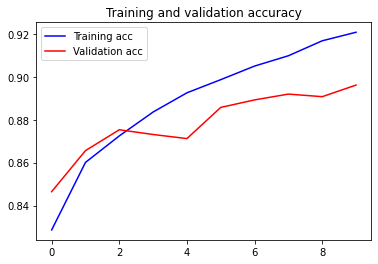

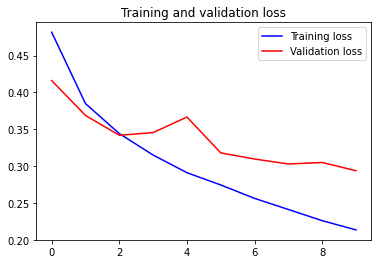

In [ ]:
#setting the random seed for reproducibility
random.seed(12)
np.random.seed(12)
tf.random.set_seed(12)

#Model creation
model=tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
     tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(10)
    ])

#create a learning_rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9)

#configuring and compiling the model
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'], optimizer=opt)
#opt = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.98, nesterov=True)
#model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'], optimizer=opt)


# Fit the data on the model
model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=10)

# Plot Validation parameters
plotModel()

### **Note:**
Reduced training loss by adding one extra layer(no difference observed further when added few more extra layers and hence stopped with this). Also realized that Adam optimizer produces better training loss than SGD with momentum.

# Regularized the model using early stopping, dropout, and/or weight decay.(Q8)

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 0.7927 - accuracy: 0.7404 - val_loss: 0.5035 - val_accuracy: 0.8352
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5529 - accuracy: 0.8188 - val_loss: 0.4606 - val_accuracy: 0.8548
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5061 - accuracy: 0.8377 - val_loss: 0.4492 - val_accuracy: 0.8536
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4703 - accuracy: 0.8471 - val_loss: 0.4301 - val_accuracy: 0.8558
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4462 - accuracy: 0.8530 - val_loss: 0.3874 - val_accuracy: 0.8719
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4226 - accuracy: 0.8617 - val_loss: 0.3945 - val_accuracy: 0.8699
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4124 - accuracy: 0.8627 - val_loss: 0.3788 - val_accuracy:

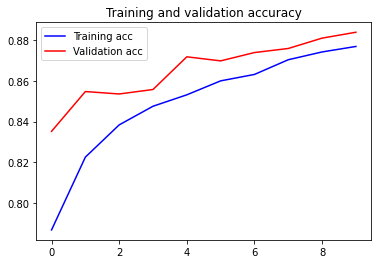

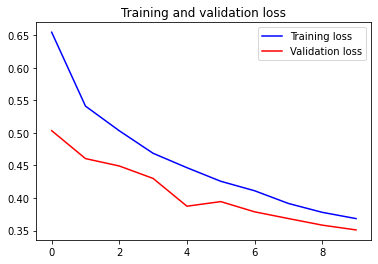

In [ ]:
#setting the random seed for reproducibility
random.seed(13)
np.random.seed(13)
tf.random.set_seed(13)

#We have to create the model again from scratch
model=tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(10)
    ])

#create a learning_rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9)

#configuring and compiling the model
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'], optimizer=opt)
#opt = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.98, nesterov=True)
#model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'], optimizer=opt)

#callback for early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, min_delta=1e-4, restore_best_weights=True)

# Fit the data on the model
model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=10, callbacks=callback)

# Plot Validation parameters
plotModel()

After regularization, though model overfitting reduced, we ended up with high losses. 

# Hyperparameter tuning(Q9)
Use hyperband to tune the hyperparameters learning_rate, number of neurons in each layer, dropout rate, and activation function in each layer. Set the max_epochs to a value slightly higher than the number of epochs you expect your model to converge, and use early stopping during training. Get the best model and print the best hyperparameter combination you found.

In [ ]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 71kB 9.2MB/s 


To use hyper parameter tuning in keras, we need to first define a function that

creates a placeholder for each hyparameter with a range of values that we want to try for that hyperparameter ( that is, the hyperparameter search space).
defines the model architecture and compiles it using these placeholders.

In [ ]:
def model_builder(hp):
  
  #creating a placeholder for each hyperparameter with a range of values for each hyperparameter we want to tune
  hp_units = hp.Int('units', min_value = 16, max_value = 512, step = 32)
  hp_dropout_rate = hp.Float('dropout', min_value = 0,max_value = 0.5, step = 0.1)
  hp_learningrate=hp.Float("learning_rate",min_value=1e-4, max_value=1e-2, sampling='log')
  hp_momentum=hp.Choice("momentum", values=(0.5, 0.9, 0.99))
  
  #creating and compiling model as usual but replace the constant values for the hyperparameters you want to tune with their placeholders defined above
  model=tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(hp_units, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        tf.keras.layers.Dropout(hp_dropout_rate),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(hp_units, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        tf.keras.layers.Dropout(hp_dropout_rate),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(10)
    ])
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
      initial_learning_rate=hp_learningrate,
      decay_steps=1000,
      decay_rate=0.9)

  #configuring and compiling the model
  opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'], optimizer=opt)
  #opt = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=hp_momentum, nesterov=True)

  return model


In [ ]:
import kerastuner as kt
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 20,
                     factor = 3,
                     directory = 'hyperparameter_runs',
                     project_name = 'Fashion_MNIST_hp')   

INFO:tensorflow:Reloading Oracle from existing project hyperparameter_runs/Fashion_MNIST_hp/oracle.json
INFO:tensorflow:Reloading Tuner from hyperparameter_runs/Fashion_MNIST_hp/tuner0.json


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, min_delta=1e-4, restore_best_weights=True)

tuner.search(train_images, train_labels, validation_data=(val_images, val_labels), epochs=20, callbacks=[callback], verbose = 1)

Trial 44 Complete [00h 02m 59s]
val_accuracy: 0.8712000250816345

Best val_accuracy So Far: 0.9042999744415283
Total elapsed time: 00h 48m 25s
INFO:tensorflow:Oracle triggered exit


# Evaluate accuracy(Q10)

Next, compare how the model performs on the test dataset:

In [ ]:
best_hps=tuner.get_best_hyperparameters()[0]
best_model=tuner.get_best_models(num_models=1)[0]
print(f"""
The hyperparameter search is complete.The optimal number of units in the first densely-connected
layer is {best_hps.get('units')}. The optimal learning rate for the optimizer
is {best_hps.get('learning_rate'),}. The optimal momentum for the optimizer is
is {best_hps.get('momentum')} and the optimal dropout is {best_hps.get('dropout')}
""")


The hyperparameter search is complete.The optimal number of units in the first densely-connected
layer is 464. The optimal learning rate for the optimizer
is (0.00019040225014503844,). The optimal momentum for the optimizer is
is 0.99 and the optimal dropout is 0.0



In [ ]:
test_loss, test_acc = best_model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4075 - accuracy: 0.8962

Test accuracy: 0.8962000012397766


In [ ]:
Accuracy of the best model on the test data is 89.6%

It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

# Make predictions(Q11)

With the model trained, you can use it to make predictions about some images.
The model's linear outputs, [logits](https://developers.google.com/machine-learning/glossary#logits). Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 

In [ ]:
probability_model = tf.keras.Sequential([best_model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

Graph this to look at the full set of 10 class predictions.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Incorrect Predictions
Indexes and count to elements predicted incorrecyly

In [ ]:
incorrect_pred = [i for i in range(len(test_labels)) if (np.argmax(predictions[i]) != test_labels[i])]
len(incorrect_pred)


1038

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Code to plot the first 100 images in the test data that were incorrectly classified by our model

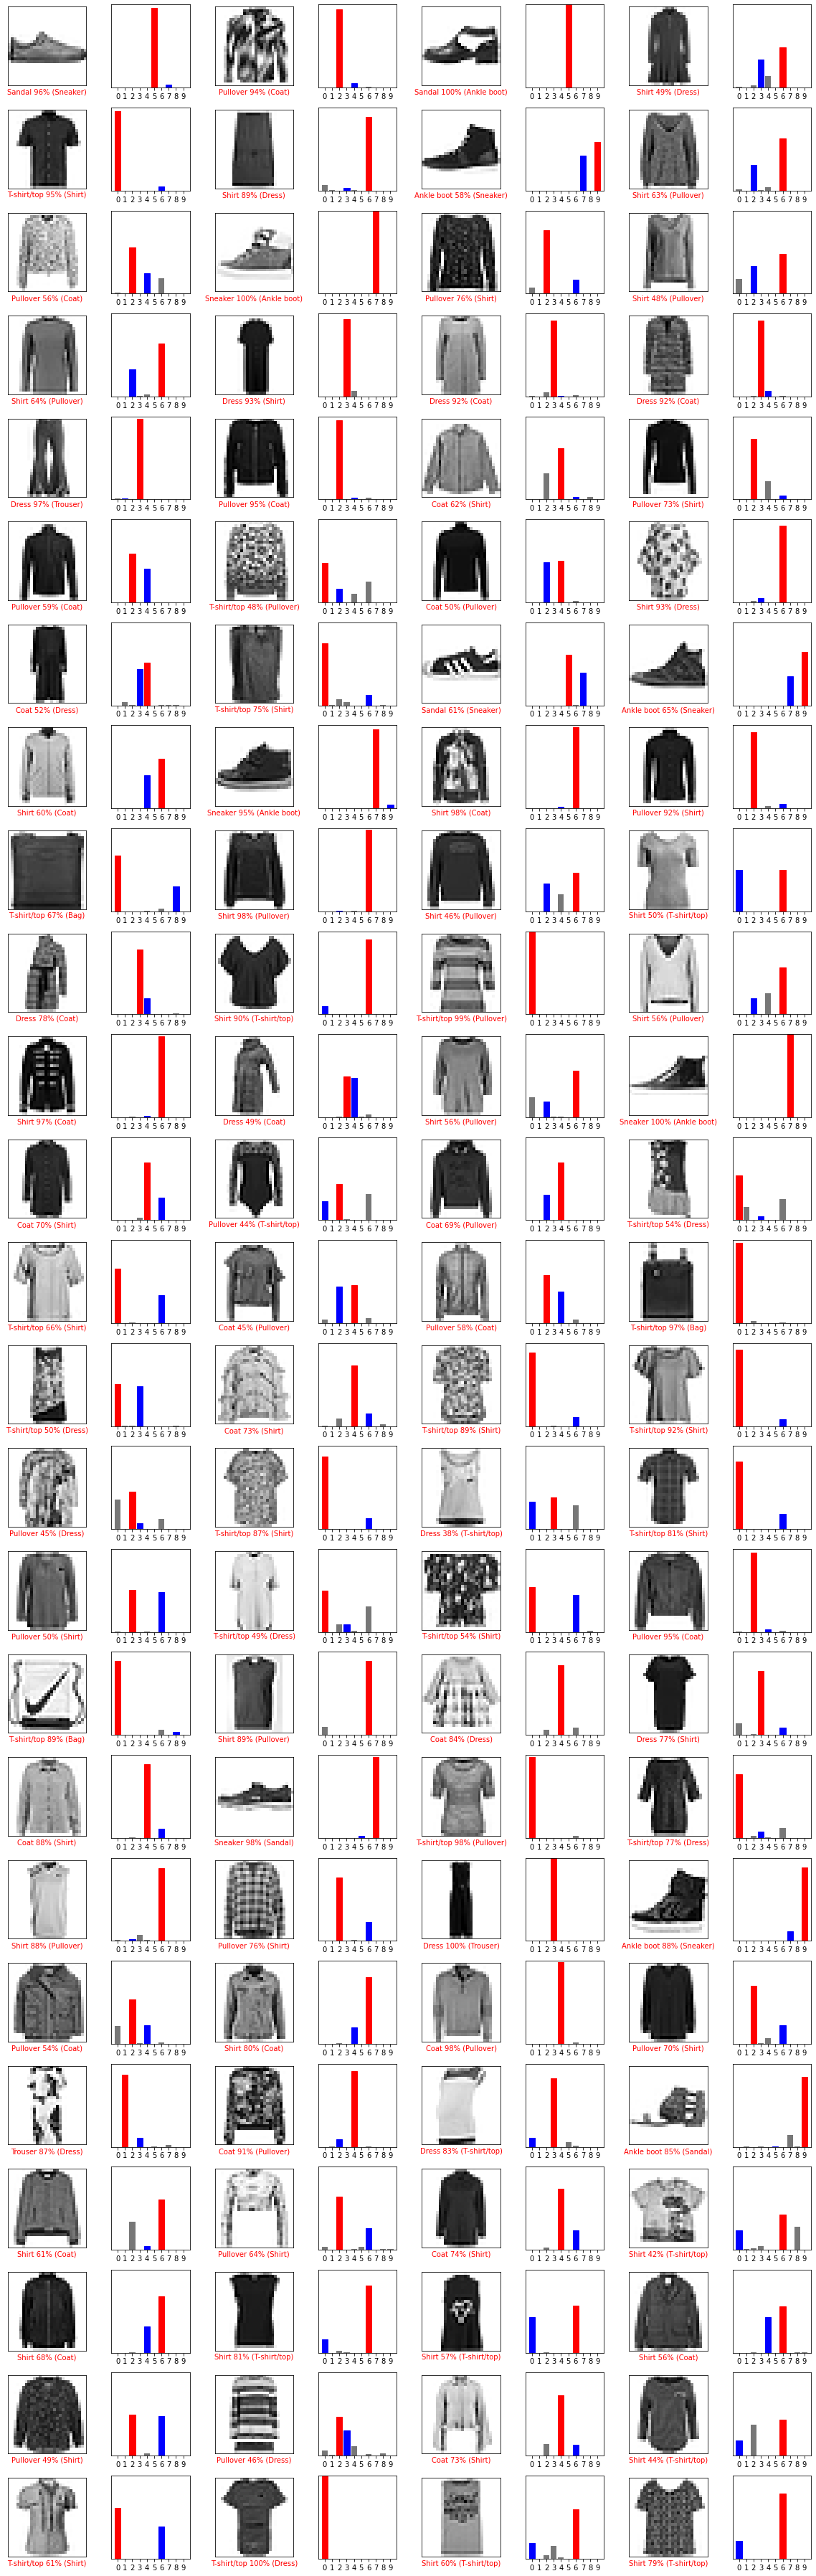

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 25
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(incorrect_pred[i], predictions[incorrect_pred[i]], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(incorrect_pred[i], predictions[incorrect_pred[i]], test_labels)
plt.tight_layout()
plt.show()

### Most of the items are mistaken to be: a shirt

In [ ]:
Labels=[]
for i in range(len(incorrect_pred)):
  Labels.append(np.argmax(predictions[incorrect_pred[i]]))
most_common_item = max(Labels, key = Labels.count)

print(most_common_item)

6


### From the first 100 records of the below data, items are mostly mistaken to be T-shirt/top with high confidence(>90%)

In [ ]:
for i in range(len(incorrect_pred)):
  print('Element:{}, Item:{} Confidence:{}'.format(i,np.argmax(predictions[incorrect_pred[i]]),np.max(predictions[incorrect_pred[i]])))

Element:0, Item:5 Confidence:0.9610110521316528
Element:1, Item:2 Confidence:0.9389791488647461
Element:2, Item:5 Confidence:0.9996681213378906
Element:3, Item:6 Confidence:0.48737597465515137
Element:4, Item:0 Confidence:0.9536572694778442
Element:5, Item:6 Confidence:0.8908464312553406
Element:6, Item:9 Confidence:0.5826418995857239
Element:7, Item:6 Confidence:0.6303881406784058
Element:8, Item:2 Confidence:0.5586569309234619
Element:9, Item:7 Confidence:0.9982352256774902
Element:10, Item:2 Confidence:0.7605152726173401
Element:11, Item:6 Confidence:0.4817711412906647
Element:12, Item:6 Confidence:0.6376857161521912
Element:13, Item:3 Confidence:0.9308885335922241
Element:14, Item:3 Confidence:0.9157673120498657
Element:15, Item:3 Confidence:0.9154828786849976
Element:16, Item:3 Confidence:0.9703354239463806
Element:17, Item:2 Confidence:0.9521817564964294
Element:18, Item:4 Confidence:0.6198655962944031
Element:19, Item:2 Confidence:0.7313118577003479
Element:20, Item:2 Confidence